In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import json

DATA_PATH = "../cleaned_df_FINALISSIMISSIMO_2006_2021.csv"

In [2]:
df = pd.read_csv(DATA_PATH, sep=";", parse_dates=False,
                 keep_default_na=False, low_memory=False)
# remove all rows not found
none_rows = [row_id
             for row_id, row in df.iterrows()
             if row["danceability"] == ""
             ]
df = df.drop(none_rows).copy()

In [3]:
df["date_chart"] = pd.to_datetime(df["date_chart"], format="%d.%m.%Y")
df["danceability"] = pd.to_numeric(df["danceability"])

df["song_id"] = df["id"]

# the old song_id was rubbish, in this way I give each song a numerical identifier
pclass_dict = {o_id: str(n_id)
               for n_id, o_id in enumerate(df["song_id"].unique())}
df["song_id"] = df["song_id"].map(pclass_dict)

scraper_features = ['original_song_name', 'original_artists_name',
                    'curr_rank', 'tag_fimi',
                    'publisher', 'date_chart', "song_id"]
spotify_features = [
                       column
                       for column in df.columns
                       if column not in scraper_features
                   ] + ["song_id"]
# Create and save both data frames
scraper_df = df[scraper_features]
scraper_df.to_csv("scraper_df.csv")
spotify_df = df[spotify_features].groupby("song_id").first()
spotify_df.to_csv("spotify_df.csv")

In [4]:
df.shape
df_r = df.set_index("date_chart").resample("M").mean()

In [5]:
m_df = pd.merge(scraper_df, spotify_df.reset_index(), on="song_id")
m_df_r = m_df.set_index("date_chart").resample("M").mean()

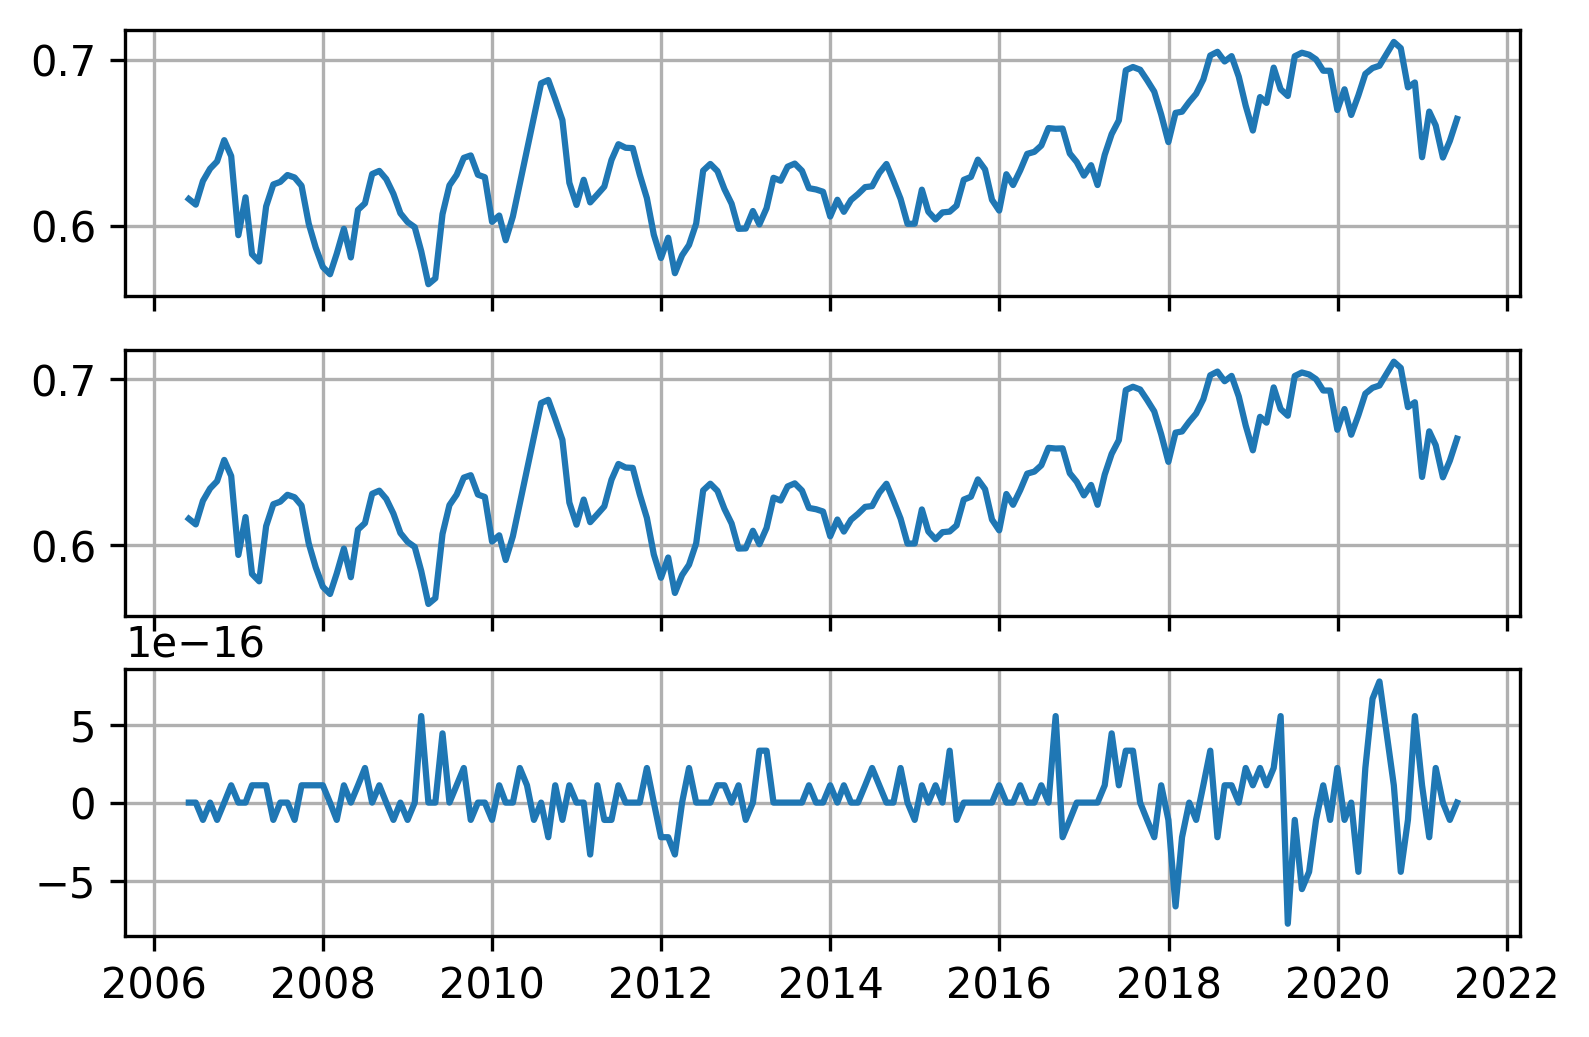

In [28]:
fig, ax = plt.subplots(3,1, dpi=300, sharex=True)
ax[0].plot(df_r.index, df_r["danceability"])
ax[0].grid()

ax[1].plot(df_r.index, m_df_r["danceability"])
ax[1].grid()

ax[2].plot(df_r.index, df_r["danceability"] - m_df_r["danceability"])
ax[2].grid()

In [20]:
s = pd.concat([df_r["danceability"], m_df_r["danceability"]], axis=1)

In [23]:
s.columns = ["pippo", "pluto"]

In [37]:
for _, r in s.iterrows():
    d = r["pippo"] - r["pluto"]
    if abs(d) > 0.001:
        print(d)

In [40]:
!ls

check_data_integrity_pandas_version.py	scraper_df.csv
check_data_integrity.py			similarity_score_QC.png
check_data_integrity_row_by_row.py	spotify_df.csv
check_for_nan.py			ultimate_conversion_dict.json
create_json_converter.py		Untitled.ipynb


In [41]:
with open("ultimate_conversion_dict.json", "r") as r_json:
    a = json.load(r_json)

In [42]:
a

{'62': '6cPLCU7hKjgjvLWzCevl7R',
 '63': '2eqKaF9zznD2WWrgAeoq8n',
 '64': '5BSclXJTa9B0iURhUjZo50'}